In [1]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_data['target'] = iris['target']
iris_data['target'] = iris_data['target'].apply(lambda x:iris['target_names'][x])
print(iris_data.shape)

(150, 5)


In [2]:
# Seperating the feature vectors from the class labels
X = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = iris_data['target']

In [3]:
# Seperating dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.20, random_state=0)

In [4]:
# Initializing a decision tree classifier that uses Gini as the splitting criteria and builds trees up to a maximum depth of 4
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion='gini', max_depth=10)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [6]:
# Making a prediction
y_pred = DT_model.predict(X_test)

In [7]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype=object)

In [8]:
# Evaluating the performance by comparing the predicted results with the actual class labels
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_pred))

1.0


In [9]:
#1.0 above represents 100% accuracy

#Using Confusion matrix to show the cross-tabulated count of actual labels and predicted labels.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [15]:
# Interpreting and visualizing the decision tree

import IPython
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
selected_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
dot_data = export_graphviz(DT_model, feature_names= selected_cols)
graph = pydotplus.graph_from_dot_data(dot_data)
img = IPython.display.Image(graph.create_png())

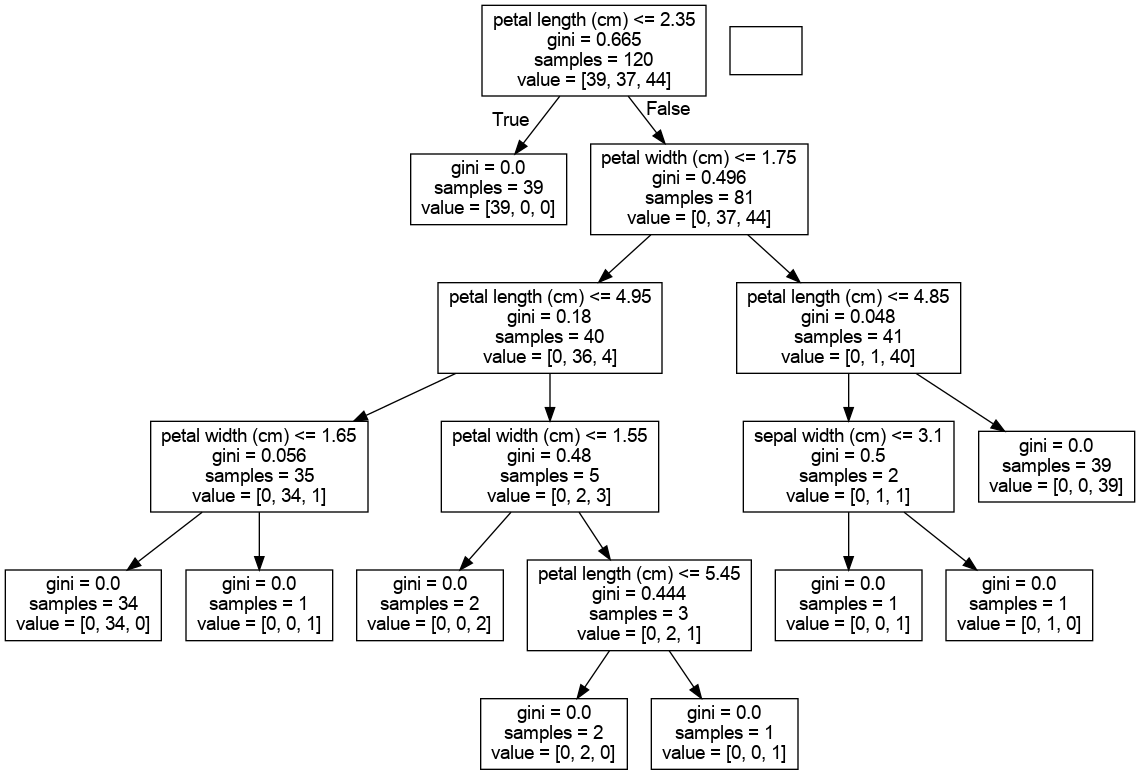

In [17]:
IPython.display.display(img)